# 2 Data Wrangling - for Stroke Prediction<a id='2_Data_wrangling'></a>

## Contents<a id='2.1_Contents'></a>
* 2 Data wrangling - for Stroke Prediction
  * 2.1 Imports
  * 2.2 Load Healthcare Dataset Stroke Data
  * 2.3 Exploring The Healthcare Dataset Stroke Data
    * 2.3.1 Looking at Random patient in healthcare dataset
    * 2.3.2 Number Of Missing Values By Column
    * 2.3.3 Categorical Features of Healthcare Dataset
      * 2.3.3.1 Unique work_type features
      * 2.3.3.2 Marriage Status and Residence types of patients
    * 2.3.4 What are the risk factors of a stroke?
  * 2.4 Categorical Features of Healthcare Dataset/Exploratory Data Analysis
    * 2.4.1 Age - as a stroke factor
    * 2.4.2 Hypertension (aka High Blood Pressure)- as a stroke factor.
    * 2.4.3 Heart Disease - as a stroke factor.
    * 2.4.4 Average Glucose Level - as a stroke factor.
    * 2.4.5 BMI - as a stroke factor.
    * 2.4.6 Smoking Status - as a stroke factor.
    * 2.4.7 Has the patient already had a stroke? - as a stroke factor.
  * 2.5 Review distributions
  * 2.6 Summary

## Introduction<a id='2.2_Introduction'></a>

[Link](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get a stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

## 2.1 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from pandas_profiling import ProfileReport #jeff suggestion
from sklearn.preprocessing import LabelEncoder
#from library.sb_utils import save_file

There are some fundamental questions to resolve in this notebook before you move on.

* Do you think you may have the data you need to tackle the desired question?
    * Have you identified the required target value?
    * Do you have potentially useful features?
* Do you have any fundamental issues with the data?

## 2.2 Load Healthcare Dataset Stroke Data

In [2]:
# the supplied CSV data file is the raw_data directory
stroke_data = pd.read_csv('../raw_data/healthcare-dataset-stroke-data.csv')

In [3]:
#Call the info method to see a summary of the data
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


`gender` is the gender of the patient.
`hypertension` is also another important column because it is linked to stroke. 
The other columns are potential symptoms that could lead to a stroke.

What data should I be looking at, in order to determine if patient will have a stroke?

In [4]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


I don't see any missing values as of yet, however I have many columns with 'str' types that I will need to address.

I assume that 0 = No, and 1 = Yes. For instance in the `hypertension` column if the value is 0 it means the patient does NOT have hypertension.

## 2.3 Exploring The Healthcare Dataset Stroke Data

### 2.3.1 Looking at Random patient in healthcare dataset 

In [5]:
#Looking at one patient, id # 56939, in order to see what one patient will look like.

stroke_data[stroke_data.id == 56939].T

,154
id,56939
gender,Female
age,55.0
hypertension,0
heart_disease,0
ever_married,Yes
work_type,Self-employed
Residence_type,Rural
avg_glucose_level,92.98
bmi,25.6


### 2.3.2 Number Of Missing Values By Column

The healthcare dataset doesn't appear to have any missing values, but lets look by counting the number of missing values in each column and sort them.

In [6]:
missing = pd.concat([stroke_data.isnull().sum(), 100 * stroke_data.isnull().mean()], axis=1)

missing.columns=['count', '%']

missing.sort_values(by= 'count')

,count,%
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


`bmi` is the ONLY column with missing values, at 3.933%. A total of 201 rows have missine values in the `bmi` column.

Body Mass Index or BMI is a very big indicator of a persons health. So these missing values in the patient's row are very important, I will have to consider dropping the rows with the `bmi` missing values.

In [7]:
#fill the missing values in the bmi with the mean of that variable
stroke_data['bmi'].fillna(stroke_data.bmi.mean(), inplace=True)

In [8]:
missing = pd.concat([stroke_data.isnull().sum(), 100 * stroke_data.isnull().mean()], axis=1)

missing.columns=['count', '%']

missing.sort_values(by= 'count')

,count,%
id,0,0.0
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0
bmi,0,0.0


Now we have no missing values, but we do have categorical features.

### 2.3.3 Categorical Features of Healthcare Dataset

Now we inspect categorical features of the healthcare dataset, of which there are many: `gender` , `ever_married`, `work_type` , `Residence_type` , and `smoking_status` . 

In [9]:
stroke_data.select_dtypes(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


Of the 12 columns of data that stroke_data has, 5 columns are categorical features.

Are there any problems with these columns? Are any unique?

* Is `work_type` unique?
* Is `smoking_status` always truthful? What about an unknown value in this column? Should we throw them away?

#### 2.3.3.1 Unique `work_type` features

In [10]:
stroke_data['work_type'].value_counts().head()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

5 different answers for `work_type` in regards to patients answers about the type of work they do.

Work does have a big impact on stress, which would have a big impact on stroke.

However, there are a lot of answers with a 'private' value meaning that they didn't indicate the type of work they do. Which means it could be stressful or not stressful, and the patient would rather not indicate it.

#### 2.3.3.2 Marriage Status and Residence types of patients

Are their any relationships between `ever_married` and `Residence_type`?

In [11]:
stroke_data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [12]:
stroke_data['Residence_type'].value_counts() #is there a difference in stroke rates between living situations?

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

We could assume that once you get married you could live in a 'Rural' home, but most couples today have jobs and lives in 'Urban' cities. So I don't believe there is a relationship between the two columns.

If we look at the `Residence_type` column it is pretty evenly split and can't really guess where the patient might live because its a 50/50 chance.

### 2.3.4 What are the risk factors of a stroke?

According to the [Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113) there are many factors that can increase your stroke, both Lifestyle risk factors and medical risk factors.

Lifestyle risk factors are:
* Being overweight or obese
* Physical inactivity
* Heavy or binge drinking
* Use of illegal drugs such as cocaine and methamphetamine

Medical risk factors are:
* High blood pressure
* Cigarette smoking or secondhand smoke exposure
* High cholesterol
* Diabetes
* Obstructive sleep apnea
* Cardiovascular disease, including heart failure, heart defects, heart infection or abnormal heart rhythm, such as atrial fibrillation
* Personal or family history of stroke, heart attack or transient ischemic attack
* COVID-19 infection

There are also other factors that are associated with a higher risk of stroke.

This includes:
* Age — People age 55 or older have a higher risk of stroke than do younger people.
* Race — African Americans have a higher risk of stroke than do people of other races.
* Sex — Men have a higher risk of stroke than women. Women are usually older when they have strokes, and they're more likely to die of strokes than are men.
* Hormones — Use of birth control pills or hormone therapies that include estrogen increases risk.

## 2.4 Categorical Features of Healthcare Dataset/Exploratory Data Analysis

Looking at all the factors above, lets look once again at our column headers to see what features we have.

In [13]:
for col in stroke_data.columns:
    print(col)

id
gender
age
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status
stroke


We can see that we have factors of stroke such as:
* Age
* Hypertension (which is another name for high-blood pressure)
* Heart disease
* Average glucose level (which can be an indicator of Diabetes)
* BMI Body Mass Index (which is an indicator of obesity, and a patients physique)
* Smoking Status (which tells us if they smoked)
* Stroke (if they have had a stroke before)

#### 2.4.1 Age - as a stroke factor.<a id=''></a>

Lets look at the age column first to see what we have. We may need to clean it up.

In [14]:
stroke_data['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.48       3
1.40       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64

Opps looks like theres some funky data in this column, it looks like we have data from children!! 

Mayo clinic says only look at patients above the age of 55 have higher risk of stroke, should I delete rows of people younger than that?

I feel like people above the age of 30 could be at risk?

But according to this article, stroke can happen anytime regardless of age, race, gender https://newsnetwork.mayoclinic.org/discussion/stroke-impacts-all-regardless-of-age-race-and-gender/

So I think I should keep in all age ranges of the dataset.

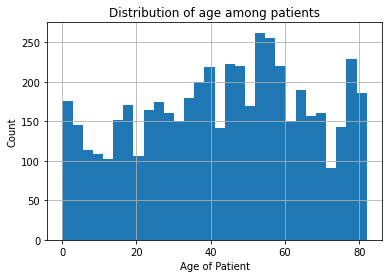

In [15]:
#lets see the age distribution, looks pretty evenly spread
stroke_data.age.hist(bins=30)
plt.xlabel('Age of Patient')
plt.ylabel('Count')
plt.title('Distribution of age among patients')
plt.savefig("age-among-patients.png");

#### 2.4.2  Hypertension (aka High Blood Pressure)- as a stroke factor.<a id=''></a>

In [16]:
stroke_data['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

Looks like only 9.7% of patients have hypertension.

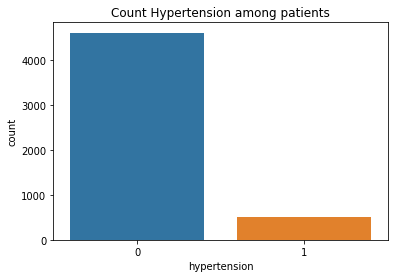

In [17]:
#hypertension may not have been diagnosed in many patients yet?
#stroke_data.hypertension.hist(bins=100)
#plt.xlabel('Hypertension')
#plt.ylabel('Count')
#plt.title('Distribution of Hypertension among patients');

sns.countplot(x='hypertension', data=stroke_data)
plt.title('Count Hypertension among patients')
plt.show()

#### 2.4.3  Heart Disease - as a stroke factor.<a id=''></a>

In [18]:
stroke_data['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

Looks like only 5.4% of patients have been diagnosed with heart disease.

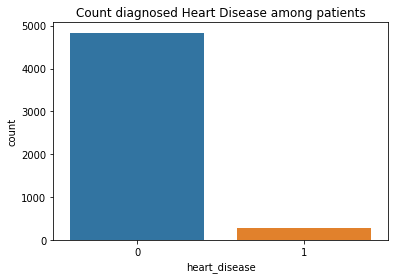

In [19]:
#lets see how many patients have been diagnosed with heart disease, I'll wager 
#that most of these patients do in fact have a form of heart disease
#stroke_data.heart_disease.hist(bins=100)
#plt.xlabel('heart_disease')
#plt.ylabel('Count')
#plt.title('Distribution of diagnosed Heart Disease among patients');

sns.countplot(x='heart_disease', data=stroke_data)
plt.title('Count diagnosed Heart Disease among patients')
plt.show()

#### 2.4.4 Average Glucose Level - as a stroke factor.<a id=''></a>

In [20]:
stroke_data['avg_glucose_level'].value_counts()

93.88     6
72.49     5
84.10     5
91.68     5
83.16     5
         ..
95.02     1
120.09    1
197.58    1
99.91     1
60.50     1
Name: avg_glucose_level, Length: 3979, dtype: int64

What is a good average glucose level? 

From the Mayo Clinic: https://www.mayoclinic.org/diseases-conditions/diabetes/in-depth/blood-sugar/art-20046628

The American Diabetes Association (ADA) generally recommends the following target blood sugar levels:

- Between 80 and 130 milligrams per deciliter (mg/dL) or 4.4 to 7.2 millimoles per liter (mmol/L) before meals
- Less than 180 mg/dL (10.0 mmol/L) two hours after meals

It is not clear whether or not the data is in milligrams? I guess we could assume that it is.

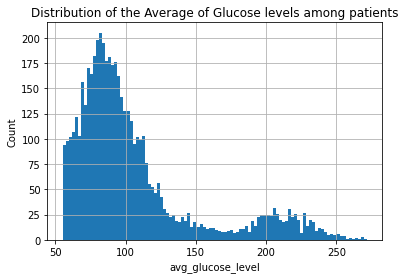

In [21]:
stroke_data.avg_glucose_level.hist(bins=100)
plt.xlabel('avg_glucose_level')
plt.ylabel('Count')
plt.title('Distribution of the Average of Glucose levels among patients');

Since the ADA recommends between 80 to 130 mg, we can see that most of our patients are in that healthy range.
The patients with high blood sugar, that curve that starts from 175mg to 250mg is something to look out for.

#### 2.4.5  BMI - as a stroke factor.<a id=''></a>

In [22]:
stroke_data['bmi'].value_counts()

28.893237    201
28.700000     41
28.400000     38
26.700000     37
26.100000     37
            ... 
48.000000      1
49.400000      1
47.400000      1
46.600000      1
54.000000      1
Name: bmi, Length: 419, dtype: int64

What is a good Body Mass Index? IT DEPENDS ON THE HEIGHT OF THE PATIENT< AND WE DONT HAVE THAT DATA!!!

But According to the Mayo clinic: https://newsnetwork.mayoclinic.org/discussion/mayo-clinic-q-and-a-bmi-is-not-the-only-indicator-of-your-overall-health/
BMI values between 18.5 and 24.9 are considered normal. 
Values between 25 and 30 are considered overweight, 
and values greater than 30 are considered obese. 
Generally, a BMI that is more than 30 is associated with higher risks to health. These risks include a higher likelihood of developing diseases and health problems, such as heart disease, diabetes and high blood pressure.

So BMI:
- 18.5 - 24.9 = normal
- 25 - 30 = overweight
- values > 30 = obese


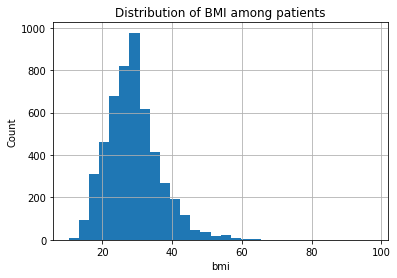

In [23]:
stroke_data.bmi.hist(bins=30)
plt.xlabel('bmi')
plt.ylabel('Count')
plt.title('Distribution of BMI among patients');
#it does look like the mean of BMI among patients is right at 25 which makes them overweight
#need to explore this further

#### 2.4.6 Smoking Status - as a stroke factor.<a id=''></a>

In [24]:
stroke_data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

There are 4 answers here:
- They've never smoked
- They don't know if they smoked????
- They smoked in the past
- They do currently smoke

I understand that this is a factor in a stroke situation, but I don't know if this data is good enough to be used.

However there are children/young adults in this dataset that would make me think they would go in the 'Unknown' category.

This is from the CDC explaining how smoking can cause stroke: https://www.cdc.gov/tobacco/campaign/tips/diseases/heart-disease-stroke.html

How Is Smoking Related to Heart Disease and Stroke?
Smoking is a major cause of cardiovascular disease (CVD) and causes one of every four deaths from CVD Smoking can
- Raise triglycerides (a type of fat in your blood)
- Lower “good” cholesterol (HDL)
- Make blood sticky and more likely to clot, which can block blood flow to the heart and brain
- Damage cells that line the blood vessels
- Increase the buildup of plaque (fat, cholesterol, calcium, and other substances) in blood vessels
- Cause thickening and narrowing of blood vessels


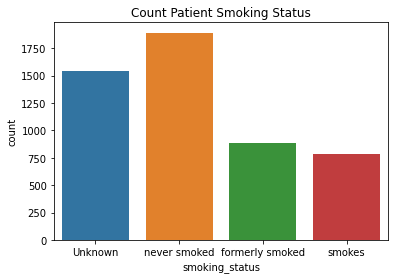

In [25]:
category_order = ['Unknown', 'never smoked', 'formerly smoked', 'smokes']
sns.countplot(x='smoking_status', data=stroke_data, order=category_order)
plt.title('Count Patient Smoking Status')
plt.show()

#### 2.4.7 Has the patient already had a stroke? - as a stroke factor.<a id=''></a>

In [26]:
stroke_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Looks like some of our patients have already had a stroke. About 4.9% of them.

Should I take these patients out of the dataset? Or should I use them as a basis for people who did have a stroke?

## 2.5 Review distributions

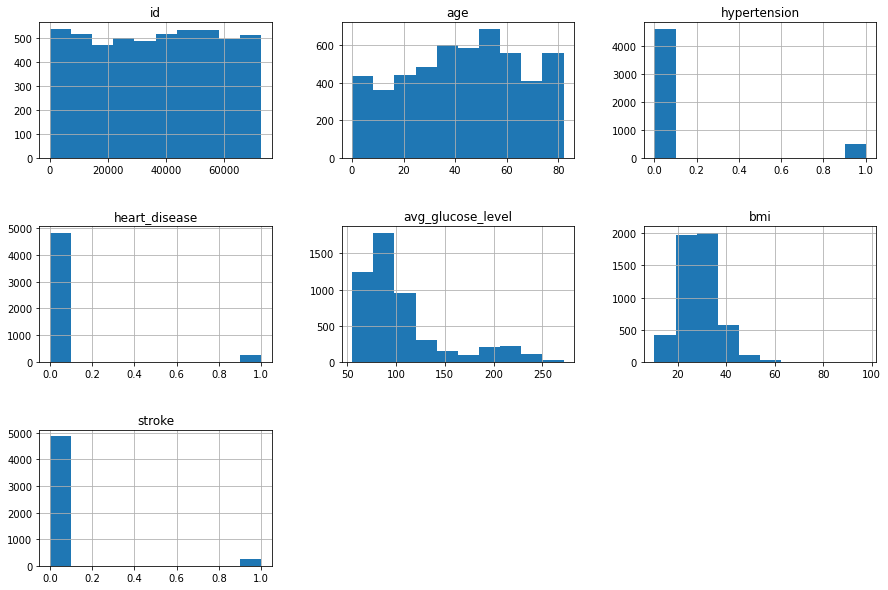

In [27]:
stroke_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

#only id, age, hypertension, heart_disease, avg_gluclose_level, BMI, and stroke can be graphed

## 2.6 Summary

The original shape of this data was 5110 number of rows(observations) and 13 number of columns(variables).

I haven't removed any columns as of yet, I am considering removing rows with missing BMI values. This is because BMI is an important factor of physical health, and one that is attributed to the amount of fat a person has, which is a factor of stroke. But I just went ahead and put the mean of the bmi missing values.

I did find that I do even have data on children who are in the dataset, I would like to keep them, even though the Mayo clinic says that stroke mainly occurs in people age 50 and above.  

There are quite a number of categorical features that I need to figure out what to do with in the EDA section. For instance work_type, Residence_type, smoking_status, and ever_married.

## 2.6 EDA

EDA Major Tasks
1. Form hypotheses/develop investigation themes to explore 
2. Wrangle data
3. Assess the quality of data
4. Profile data
5. Explore each individual variable in the dataset
6. Assess the relationship between each variable and the target 
7. Assess interactions between variables
8. Explore data across many dimensions

Throughout the entire analysis you want to:
● Capture a list of hypotheses and questions that come up for further exploration.
● Record things to watch out for/ be aware of in future analyses.
Show intermediate results to colleagues to get a fresh perspective, feedback, domain knowledge. Don't do EDA in a bubble! Get feedback throughout especially from people removed from the problem and/or with relevant domain knowledge.
● Position visuals and results together. EDA relies on your natural pattern recognition abilities so maximize what you'll find by putting visualizations and results in close proximity.

Exploring each individual variable (Basics steps to complete during Step 1):
- Quantify:
- Location: mean, median, mode, interquartile mean Spread: standard deviation, variance, range, interquartile range
- Shape: skewness, kurtosis
- For time series, plot summary statistics over time.
- For panel data: Plot cross-sectional summary statistics over time Plot time-series statistics across the population

In [28]:
stroke_data.shape #dimensions are 5110 rows(observations) and 12 columns(variables)

(5110, 12)

### Data Wrangling 
I want to maybe drop some variables in the data because I believe there are things we don't need.

In [29]:
#I want to drop the patient ID column, because we don't need it.
stroke_data = stroke_data.drop(['id'], axis=1)

In [30]:
stroke_data.head().T

,0,1,2,3,4
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,28.893237,32.5,34.4,24.0
smoking_status,formerly smoked,never smoked,never smoked,smokes,never smoked


I also may want to drop the more columns because they are not relivant to the data I need to look at.

In [31]:
#I want to drop work_type column, because even though stress is a factor 
#I can't quanitfy it numerically. There are so many variables, and we don't know what
#'Private' means or how converting it to numerical data would make any sense.
stroke_data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [32]:
stroke_data = stroke_data.drop(['work_type'], axis=1)

In [33]:
#I want to change Residence_type to numerical instead of categorical. It would be 
#interesting to see where people who had strokes tended to live
stroke_data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [34]:
#lets rename it 'residence_type' just lower case the 'R'
le = LabelEncoder()
stroke_data['residence_type'] = le.fit_transform(stroke_data.Residence_type)

In [35]:
stroke_data['residence_type'].value_counts()
#so now we have changed Urban=1, and Rural=0

1    2596
0    2514
Name: residence_type, dtype: int64

In [36]:
stroke_data = stroke_data.drop(['Residence_type'], axis=1) #drop the orig. column

In [37]:
#I want to change the ever_married column into numerical, 1 = Yes and 0 = No
stroke_data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [38]:
stroke_data['ever_married'] = stroke_data['ever_married'].map({'Yes':1 ,'No':0})

In [39]:
stroke_data['ever_married'].value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [40]:
#I also want to change gender column into numerical, female=0, male=1
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [41]:
#opps there is one error where there is an 'Other' gender, lets drop that row possibly
gender_er = stroke_data[(stroke_data['gender'] != 'Female') & (stroke_data['gender'] != 'Male')].index

In [42]:
# drop these given row indexes from dataFrame
stroke_data.drop(gender_er, inplace = True)

In [43]:
stroke_data['gender'] = stroke_data['gender'].map({'Male':1 ,'Female':0})

In [44]:
#check data
stroke_data.head().T

,0,1,2,3,4
gender,1,0,1,0,0
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,1,1,1,1,1
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,28.893237,32.5,34.4,24.0
smoking_status,formerly smoked,never smoked,never smoked,smokes,never smoked
stroke,1,1,1,1,1
residence_type,1,0,0,1,0


Opps smoking status is still an object, not numeric. I will again look at that variable. 

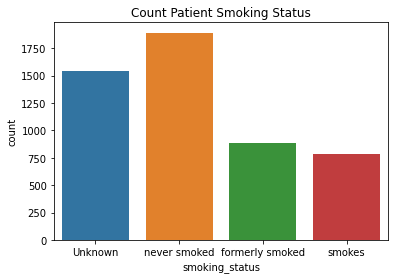

In [45]:
category_order = ['Unknown', 'never smoked', 'formerly smoked', 'smokes']
sns.countplot(x='smoking_status', data=stroke_data, order=category_order)
plt.title('Count Patient Smoking Status')
plt.show()

Maybe I will make unknown, and never smoked = 0, and formerly smoked, and smokes = 1.

In [46]:
#maybe one-hot encoded, see how it changes things
stroke_data['smoking_status'] = stroke_data['smoking_status'].map({'Unknown':0, 'never smoked':0, 'formerly smoked':1, 'smokes':1})

In [47]:
stroke_data['smoking_status'].value_counts()

0    3436
1    1673
Name: smoking_status, dtype: int64

In [48]:
#lets look at our data after all of that
stroke_data.head().T

,0,1,2,3,4
gender,1.00,0.000000,1.00,0.00,0.00
age,67.00,61.000000,80.00,49.00,79.00
hypertension,0.00,0.000000,0.00,0.00,1.00
heart_disease,1.00,0.000000,1.00,0.00,0.00
ever_married,1.00,1.000000,1.00,1.00,1.00
avg_glucose_level,228.69,202.210000,105.92,171.23,174.12
bmi,36.60,28.893237,32.50,34.40,24.00
smoking_status,1.00,0.000000,0.00,1.00,0.00
stroke,1.00,1.000000,1.00,1.00,1.00
residence_type,1.00,0.000000,0.00,1.00,0.00


### Location: mean, median, model, IQR, standard deviation.

Lets look at the profile report for an in depth look at each of these factors.

In [49]:
profile = ProfileReport(stroke_data, title="Pandas Profiling Report", explorative=True)

In [50]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

#### 2.6.1 Choosing what variables really make up a stroke?

Since the Mayo Clinic states there are many factores that can increase your stroke, both Lifestyle risk factors and medical risk factors. I will use the variables in the dataset that are lifestyle or medical risk factors.

Lifestyle risk factors are:
- Being overweight or obese (BMI)

Medical risk factors are:
- High blood pressure (Hypertension)
- Cigarette smoking or secondhand smoke exposure (smoking-status)
- Diabetes (average gluclose levels)

In [51]:
stroke_data.corr()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,residence_type
gender,1.000000,-0.027752,0.021223,0.085685,-0.030171,0.054722,-0.025606,0.043542,0.009081,-0.006105
age,-0.027752,1.000000,0.276367,0.263777,0.679084,0.238323,0.325858,0.247585,0.245239,0.014031
hypertension,0.021223,0.276367,1.000000,0.108292,0.164187,0.174540,0.160147,0.071610,0.127891,-0.007980
heart_disease,0.085685,0.263777,0.108292,1.000000,0.114601,0.161907,0.038862,0.087861,0.134905,0.003045
ever_married,-0.030171,0.679084,0.164187,0.114601,1.000000,0.155329,0.335563,0.219564,0.108299,0.005988
avg_glucose_level,0.054722,0.238323,0.174540,0.161907,0.155329,1.000000,0.168910,0.068289,0.131991,-0.004783
bmi,-0.025606,0.325858,0.160147,0.038862,0.335563,0.168910,1.000000,0.150222,0.038912,-0.000288
smoking_status,0.043542,0.247585,0.071610,0.087861,0.219564,0.068289,0.150222,1.000000,0.059007,0.027457
stroke,0.009081,0.245239,0.127891,0.134905,0.108299,0.131991,0.038912,0.059007,1.000000,0.015415
residence_type,-0.006105,0.014031,-0.007980,0.003045,0.005988,-0.004783,-0.000288,0.027457,0.015415,1.000000


2. Cleaning, Transforming, and Visualizing

need to clean data. Change smoking to numerical.



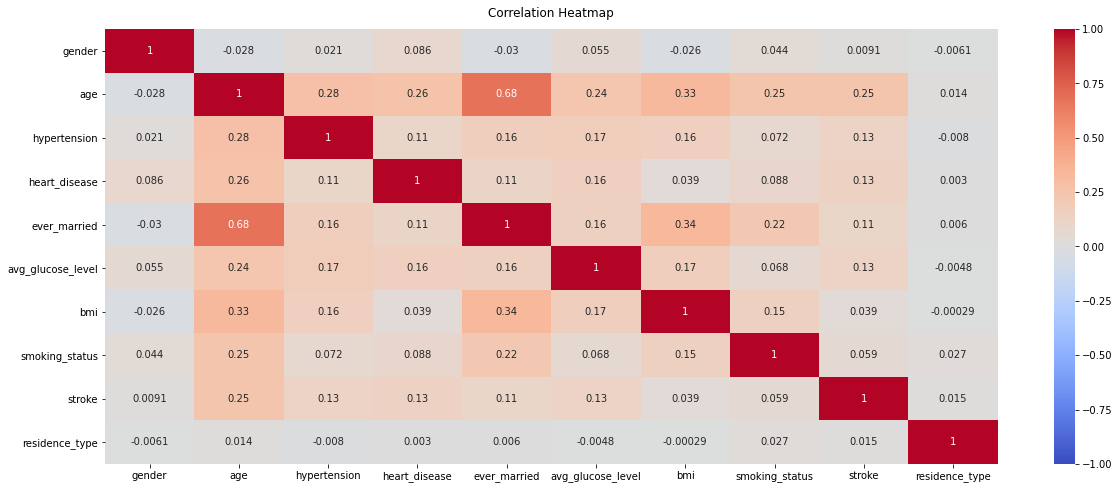

In [52]:
#lets plot the heatmap for features
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(stroke_data.corr(), vmin=-1, vmax=1, annot=True, cmap= 'coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig("correlation-heatmap.png");

Text(0.5, 1.0, 'Boxplot to check for outliers')

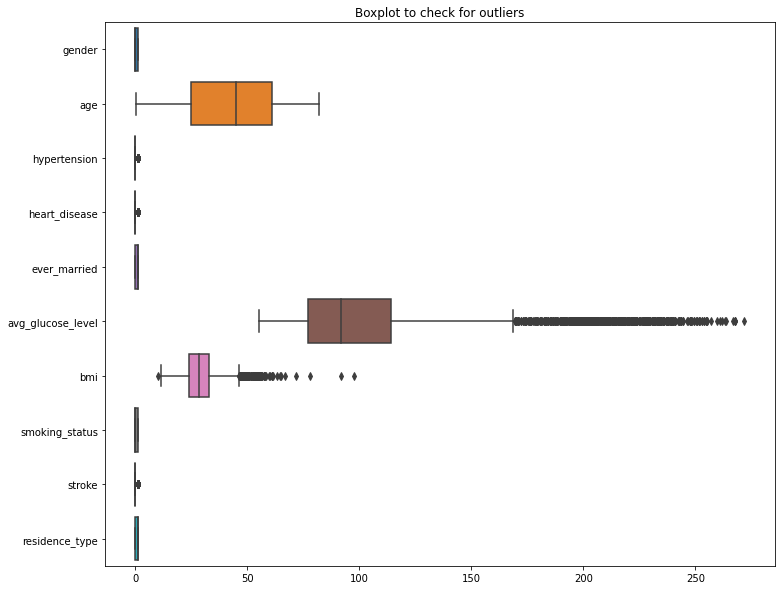

In [53]:
#Plot the boxplots to check for outliers
plt.figure(figsize=(12, 10))
boxplot = sns.boxplot(data=stroke_data, orient='h')
boxplot.set_title('Boxplot to check for outliers')

Looks like the gluclose levels have quite a range here, diabetes is a factor of stroke. This may be very important.

In [54]:
stroke_data.dtypes # yay all features are numeric!

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
residence_type         int64
dtype: object

In [55]:
stroke_data.shape #lets check shape after all of that

(5109, 10)

In [56]:
# save the data to a new csv file
stroke_data.to_csv('../data/stroke_data_cleaned.csv', index=False)


